见R包CloudandRain

## 4.1 Axial Fan (Fig 11(a)、Fig C1(a))

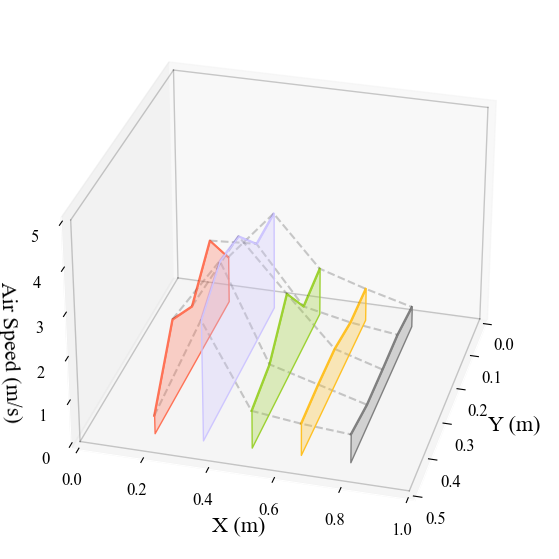

In [17]:
##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed1'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 色谱
# "coral1", "lightslateblue", "olivedrab3", "goldenrod1", "gray"
#  #ff7256， #cec6ff，         #9dd232，      #FFC125，    #808080
# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)

# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='--', alpha=0.2)

# 设置颜色条
# sc = ax.scatter(x, y, z, c=z, cmap=cm.viridis)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('Y (m)')
# ax.set_ylabel('X (m)')
ax.set_zlabel('Air Speed (m/s)')


ax.text(0.66, 0.5, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.3, 1.15, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# ax.text(0.0, 0.7, 4, s='H=z₁', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)
ax.set_zlim(0, 5)

# 设置刻度
ax.set_xticks(np.arange(0, 0.6, 0.1))
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_zticks(np.arange(0, 6, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
# ax.xaxis.label.set_rotation(0)  # Remove label rotation to make it parallel to the x-axis
# ax.xaxis.set_label_coords(0.5, -0.15)  # 手动调整标签位置，使其平行于下边缘
# ax.yaxis.label.set_rotation(0)  # Y轴标签水平
# # 手动调整 z 轴标签的旋转和位置，使其向外
# ax.zaxis.label.set_rotation(90)  # 旋转 Z 轴标签，使其垂直于 Z 轴
# ax.zaxis.label.set_verticalalignment('bottom')  # 标签对齐方式设置为底部，使其向外
# ax.zaxis.label.set_horizontalalignment('center')  # 水平居中对齐

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.5], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.5], [0, 0], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.5, 0.5], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0, 0.5], [1, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.5, 0.5], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.5], [1, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.5, 0.5], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.5, 0.5], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

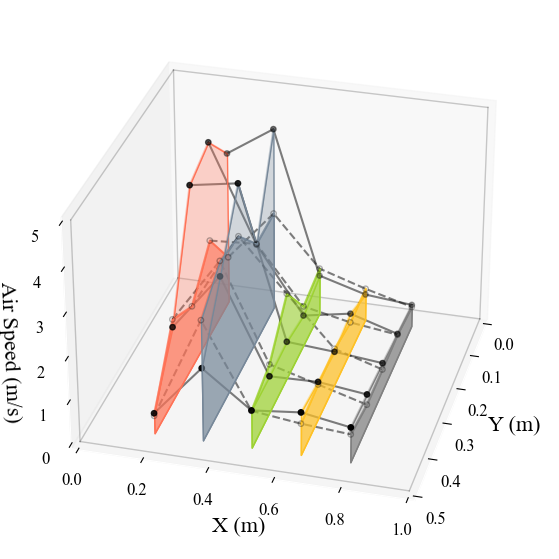

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
z1 = df['Air speed1'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="black", facecolor='none', s=15,alpha =0.3)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.66, 0.5, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.3, 1.15, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)
ax.set_zlim(0, 5)

# 设置刻度
ax.set_xticks(np.arange(0, 0.6, 0.1))
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_zticks(np.arange(0, 6, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.5], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.5], [0, 0], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.5, 0.5], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0, 0.5], [1, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.5, 0.5], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.5], [1, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.5, 0.5], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.5, 0.5], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

## 4.2 Crossflow fan (Fig 11(b)、Fig C1(b))

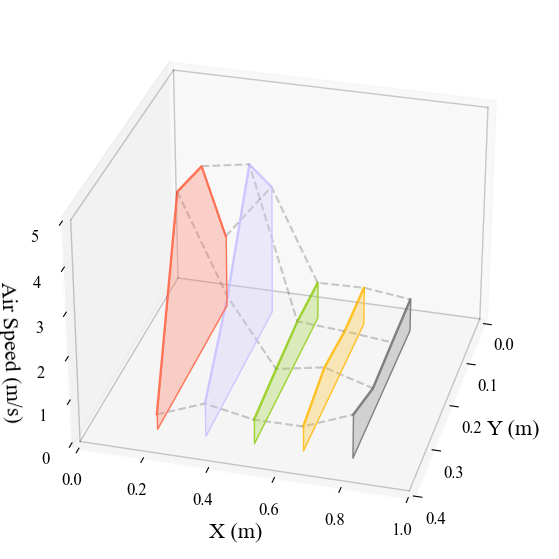

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall1.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)

# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='--', alpha=0.2)

# 设置颜色条
# sc = ax.scatter(x, y, z, c=z, cmap=cm.viridis)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.54, 0.5, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.25, 1.15, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')

# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1)
ax.set_zlim(0, 5)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_zticks(np.arange(0, 6, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0, 0.4], [1, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.4, 0.4], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.4], [1, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.4, 0.4], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 5], color='black', linewidth=1, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

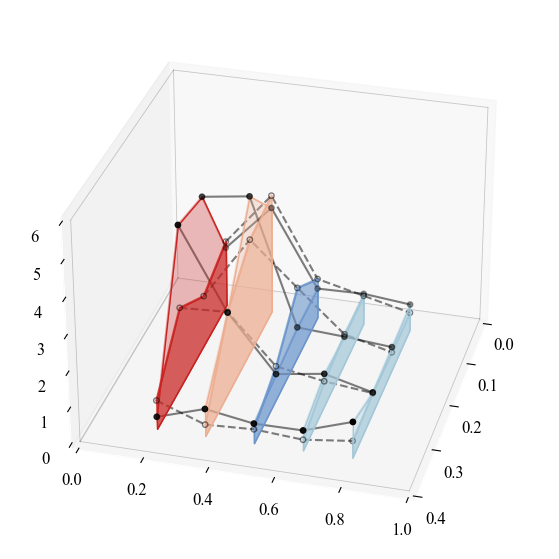

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall1.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
z1 = df['Air speed1'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#c92321', '#edae92','#6c96cc', '#a4c8d9', '#a4c8d9']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="black", facecolor='none', s=15,alpha =0.5)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1)
ax.set_zlim(0, 6)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_zticks(np.arange(0, 6.1, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 1], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 1], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0, 0.4], [1, 1], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 1], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [1, 1], [0, 0], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [1, 1], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [1, 1], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

## Fig C1 (b)

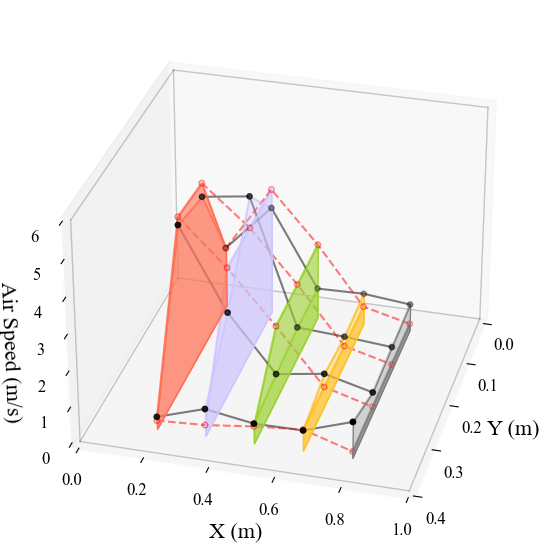

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall1.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
z1 = df['Air speed2'].values / 7 * 5.6
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='red', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="RED", facecolor='none', s=15,alpha =0.5)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.54, 0.5, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.25, 1.15, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1)
ax.set_zlim(0, 6)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_zticks(np.arange(0, 6.1, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 6], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [6, 6], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 1], [6, 6], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 1], [5, 5], color='black', linewidth=1, alpha=0.2)
# ax.plot([0, 0.4], [1, 1], [1, 1], color='black', linewidth=1, alpha=0.2)
ax.plot([0.4, 0.4], [0, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0.4], [1, 1], [0, 0], color='black', linewidth=1, alpha=0.2)
# ax.plot([0.4, 0.4], [1, 1], [0, 5], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [1, 1], [0, 6], color='black', linewidth=1, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 6], color='black', linewidth=1, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

## 4.3 Centrifugal fans with perforated air tube (Fig 11(c)、Fig 12)

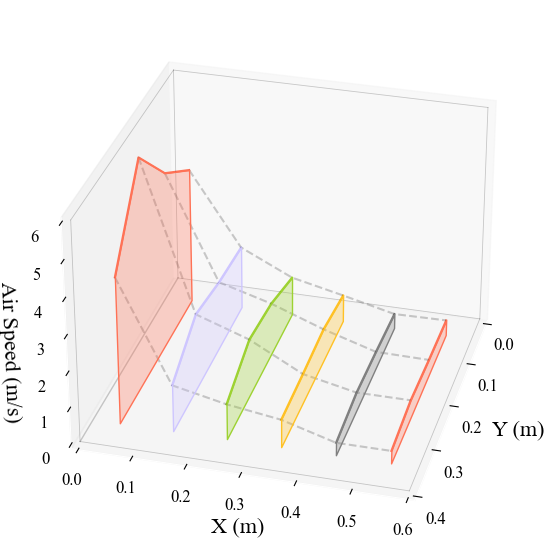

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall2.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)

# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='--', alpha=0.2)

# 设置颜色条
# sc = ax.scatter(x, y, z, c=z, cmap=cm.viridis)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.53, 0.3, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.25, 0.7, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.6)
ax.set_zlim(0, 6)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 0.7, 0.1))
ax.set_zticks(np.arange(0, 7, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0, 0.4], [0.6, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0.6, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)

# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

C:\Users\Administrator.DESKTOP-IME8OVA\AppData\Local\Temp\ipykernel_20784\3780831981.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


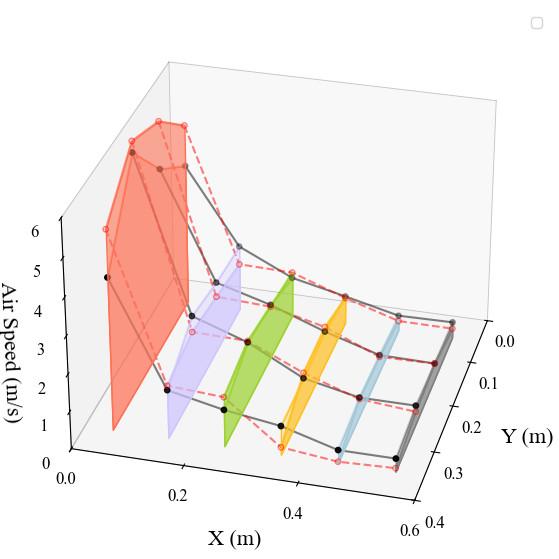

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall2.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed'].values
z1 = df['Air speed2'].values

# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#a4c8d9', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='red', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="red", facecolor='none', s=15,alpha =0.5)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')
# 添加图例
ax.legend()
# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.53, 0.3, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.25, 0.7, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.6)
ax.set_zlim(0, 6)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 0.7, 0.2))
ax.set_zticks(np.arange(0, 6.1, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0, 0.4], [0.6, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0.6, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

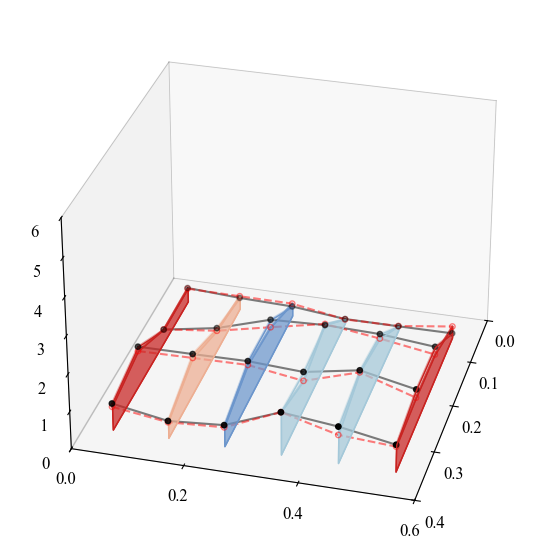

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall2.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed1'].values
z1 = df['Air speed3'].values * 1.25
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#c92321', '#edae92','#6c96cc', '#a4c8d9', '#a4c8d9']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='red', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="red", facecolor='none', s=15,alpha =0.5)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')

# 设置 y 轴的边距
ax.margins(z=0.1)

# 设置 x, y, z 的范围
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.6)
ax.set_zlim(0, 6)

# 设置刻度
ax.set_xticks(np.arange(0, 0.5, 0.1))
ax.set_yticks(np.arange(0, 0.7, 0.2))
ax.set_zticks(np.arange(0, 6.1, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, 0.4], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0, 0], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0, 0.4], [0.6, 0.6], [6, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0.4], [0.6, 0.6], [0, 0], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0.4, 0.4], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0], [0.6, 0.6], [0, 6], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0.4, 0.4], [0, 0], [0, 6], color='black', linewidth=0.6, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

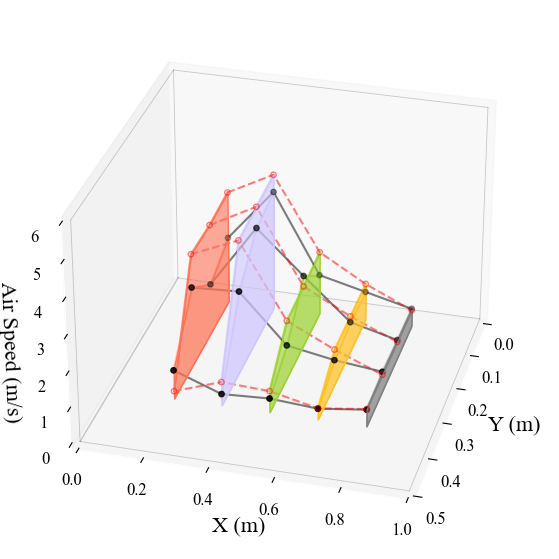

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# 读取数据
file_path = 'Waterfall1.xlsx'
df = pd.read_excel(file_path)

# 假设 'x', 'y', 'Air speed' 列对应于 X, Y, Z 数据
x = df['x'].values
y = df['y'].values
z = df['Air speed1'].values
z1 = df['Air speed3'].values
# 确保 x, y, z 的形状匹配
if len(x) != len(y) or len(x) != len(z):
    raise ValueError("x, y, and z must have the same length.")

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 获取唯一的 y 值用于绘制瀑布线
colors = ['#ff7256', '#cec6ff','#9dd232', '#FFC125', '#808080']
unique_y = np.unique(y)

for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color, alpha=0.4)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.3)
    ax.add_collection3d(poly)
    
for i, uy in enumerate(unique_y):
    mask = (y == uy)
    x_vals = x[mask]
    z_vals = z1[mask]

    # 使用指定颜色
    color = colors[i % len(colors)]
    ax.plot(x_vals, uy * np.ones_like(x_vals), z_vals, color=color,alpha=0.8)

    # 构建用于填充的多边形
    verts = [(xv, uy, zv) for xv, zv in zip(x_vals, z_vals)]
    verts += [(x_vals[-1], uy, 0), (x_vals[0], uy, 0)]
    poly = Poly3DCollection([verts], color=color, alpha=0.6)
    ax.add_collection3d(poly)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='black', linestyle='-', alpha=0.5)
# 连接相同 x 值的不同 y 值
for x_val in np.unique(x):
    mask = (x == x_val)
    y_vals = y[mask]
    z_vals = z1[mask]
    if len(y_vals) > 1:
        ax.plot([x_val] * len(y_vals), y_vals, z_vals, color='red', linestyle='--', alpha=0.5)
# 设置颜色条
sc = ax.scatter(x, y, z1, edgecolor="red", facecolor='none', s=15,alpha =0.5)
sc = ax.scatter(x, y, z, color = "black",s = 15)
# fig.colorbar(sc, ax=ax, label='Air Speed')

# 设置标签
# ax.set_xlabel('X (m)')
# ax.set_ylabel('Y (m)')
# ax.set_zlabel('Air Speed (m/s)')
ax.set_zlabel('Air Speed (m/s)')

ax.text(0.66, 0.5, 0, s='X (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')
ax.text(0.3, 1.15, 0, s='Y (m)', va='center', rotation=0, fontsize=16, fontname='Times New Roman')

# 设置 y 轴的边距
ax.margins(z=0.1)

x_max = 0.5
y_max = 1
z_max = 6

# 设置 x, y, z 的范围
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)
ax.set_zlim(0, z_max)

# 设置刻度
ax.set_xticks(np.arange(0, x_max+0.1, 0.1))
ax.set_yticks(np.arange(0, y_max+0.1, 0.2))
ax.set_zticks(np.arange(0, z_max+0.1, 1))

# 取消网格线
ax.grid(False)

# 设置背景颜色
ax.set_facecolor('white')

# 设置坐标轴位置
ax.xaxis.set_ticks_position('lower')
ax.yaxis.set_ticks_position('lower')
ax.zaxis.set_ticks_position('lower')

# 将坐标轴标签的位置设置为底部
ax.xaxis.set_label_position('lower')
ax.yaxis.set_label_position('lower')
ax.zaxis.set_label_position('lower')

# 设置字体和字号
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)

# 设置坐标轴标签字体
ax.xaxis.label.set_fontname('Times New Roman')
ax.yaxis.label.set_fontname('Times New Roman')
ax.zaxis.label.set_fontname('Times New Roman')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.zaxis.label.set_size(16)

# 设置标签旋转和对齐
ax.xaxis.label.set_rotation(0)  # X轴标签水平
ax.yaxis.label.set_rotation(0)  # Y轴标签水平
ax.zaxis.label.set_rotation(20)  # Z轴标签垂直

# 设置标签的位置
ax.xaxis.label.set_verticalalignment('center')
ax.yaxis.label.set_verticalalignment('center')
ax.zaxis.label.set_verticalalignment('center')


# 添加从 (0, 0, 0) 到 (0.5, 0, 0) 的直线
ax.plot([0, x_max],       [0, 0],         [0, 0], color='black', linewidth=1, alpha=0.2)
ax.plot([0, 0],           [0, y_max],     [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0],           [0, 0],         [0, z_max], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, x_max],       [0, 0],         [6, z_max], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0],           [0, y_max],     [6, z_max], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([x_max, x_max], [0, y_max],     [6, z_max], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([0, x_max],     [y_max, y_max], [6, z_max], color='black', linewidth=0.6, alpha=0.2)
ax.plot([x_max, x_max],   [0, y_max],     [0, 0], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, x_max],       [y_max, y_max], [0, 0], color='black', linewidth=0.6, alpha=0.2)
# ax.plot([x_max, x_max], [y_max, y_max], [0, z_max], color='black', linewidth=0.6, alpha=0.2)
ax.plot([0, 0],           [y_max, y_max], [0, z_max], color='black', linewidth=0.6, alpha=0.2)
ax.plot([x_max, x_max],   [0, 0],         [0, z_max], color='black', linewidth=0.6, alpha=0.2)
# 设置视角
ax.view_init(elev=30, azim=15)

# 显示图形
plt.show()

# 5. 预测模拟散点图

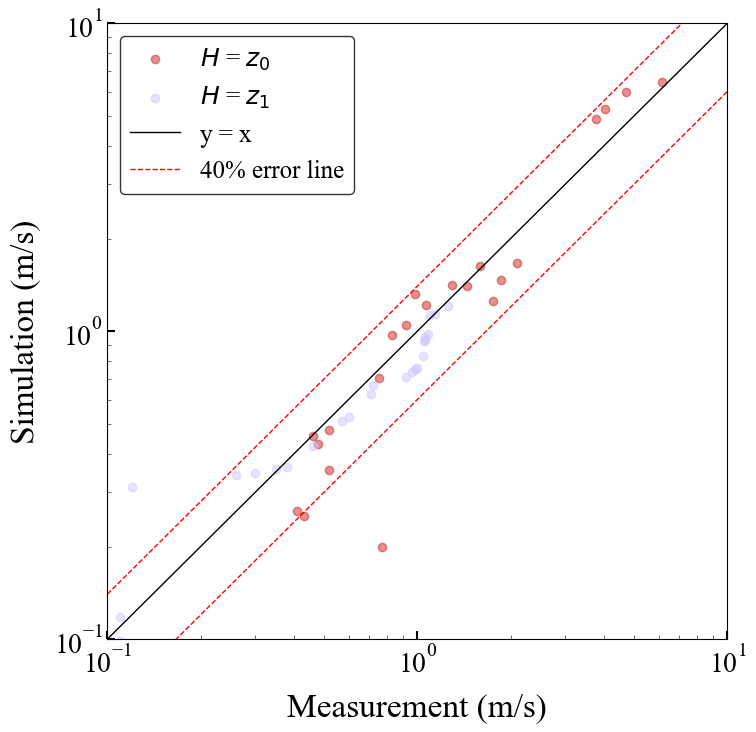

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
file_path = 'Waterfall2.xlsx'  # Update this with your file's actual path
df = pd.read_excel(file_path)

# Extract the required columns
x = df['Air speed']
y = df['Air speed2']
x1 = df['Air speed1']
y1 = df['Air speed3']*1.25

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Create the scatter plot with logarithmic scales
scatter1 = ax.scatter(x, y, color='#c92321', alpha=0.5, label=r'$\it{H}$ = $\it{z_0}$')
scatter2 = ax.scatter(x1, y1, color='#cec6ff', alpha=0.5, label=r'$\it{H}$ = $\it{z_1}$')

# Set both axes to logarithmic scale
ax.set_xscale('log')
ax.set_yscale('log')

# Set the range for both axes (0.1 to 10)
ax.set_xlim(0.1, 10)
ax.set_ylim(0.1, 10)

# Add y = x line
line_x = np.linspace(0.1, 10, 100)  # X values for the line
ax.plot(line_x, line_x, color='black', linewidth=1, label = 'y = x')  # Line y = x
ax.plot(line_x, line_x * 0.6, color='red', linestyle='--', linewidth=1)  # Line y = 0.6x
ax.plot(line_x, line_x * 1.4, color='red', linestyle='--', linewidth=1, label = '40% error line')  # Line y = 1.4x
# Add labels with custom font and style
ax.set_xlabel('Measurement (m/s)', fontsize=24, fontname='Times New Roman', labelpad=10)
ax.set_ylabel('Simulation (m/s)', fontsize=24, fontname='Times New Roman', labelpad=10)

# Set ticks to face inward
ax.tick_params(axis='both', direction='in', length=6, width=1.5)
ax.tick_params(axis='both', which='minor', direction='in', length=3, width=0.4)  # Minor ticks
plt.xticks(fontsize=20, fontname='Times New Roman')
plt.yticks(fontsize=20, fontname='Times New Roman')
# Add legend with Times New Roman font, black border, and size 25 inside prop
ax.legend(loc='upper left', frameon=True, prop={'family': 'Times New Roman', 'size': 18}, edgecolor='black')
# ax.legend(fontsize = 18)
# Display the plot
plt.show()